# Imports

In [3]:
import os
import sys
sys.path.append(os.path.sep.join(os.getcwd().split(sep=os.path.sep)[:-1]))

import PlotTools

import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(1)

In [4]:
import importlib
importlib.reload(PlotTools)

<module 'PlotTools' from 'C:\\Users\\Liel\\Dropbox\\PyCharm\\PycharmProjectsNew\\LielTools_4\\LielTools\\PlotTools.py'>

# Load data

In [5]:
iris_df = sns.load_dataset('iris')
# make some missing values
to_none = random.sample(range(0,150), 50)
iris_df.loc[to_none, 'sepal_width'] = None
iris_df.loc[to_none, 'petal_width'] = None

# show df
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,NaN,1.4,NaN,setosa
1,4.9,NaN,1.4,NaN,setosa
2,4.7,NaN,1.3,NaN,setosa
3,4.6,NaN,1.5,NaN,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,NaN,5.2,NaN,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
diam_df = sns.load_dataset('diamonds')
diam_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [50]:
peng_df = sns.load_dataset('penguins')
peng_df.drop(index=[3,339], inplace=True)
peng_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Parallel coordinates plots

##### Consider that in parallel coordinates plots, the order of the variables has gread affect over the appearance of the plot and data.

### spaghetti_patients function

In [8]:
help(PlotTools.spaghetti_patients)

Help on function spaghetti_patients in module PlotTools:

spaghetti_patients(patientDf, classColumn=None, figsize=(6, 8), linewidth=1, alpha=0.9, rotationXlabels=90, plotTitle=None, xTitle=None, yTitle=None, ylim=None, showLegend=True, saveFullPath=None, marker='', markersize=2, legend_title='', shuffle_colors=True, cmap=None)
    Gets a df. Creates a spaghetti plot with each row getting a line,
    and each column getting an x-axis point.
    
    @ patientDf: This is the only obligatory variable.
            Must contain all numeric columns (except for "classColumn")
    @ classColumn: string. Not obligatory. The name of a column of "class"
        values (can be strings / numeric column).
        Each row will be colored according to classColumn's values.
        (This column will not be used for an x-axis point)
        If classColumn=None, each row will get a different color.
    @ showLegend -  will work only if "classColumn" is given.
    @ alpha - transparency.
    @ showFig = 

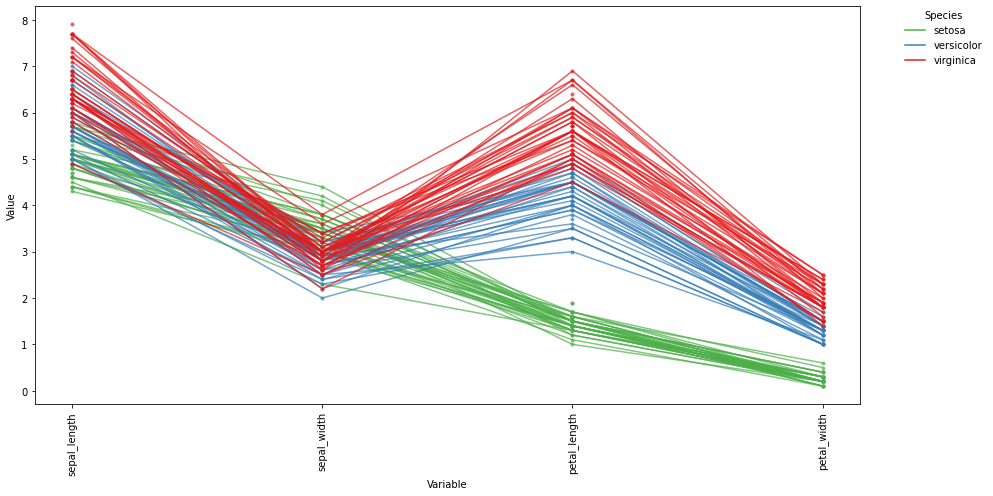

In [9]:
fig = PlotTools.spaghetti_patients(iris_df, classColumn='species', figsize=(14,7),
                       linewidth=1.5, alpha=0.7, rotationXlabels=90,
                       plotTitle=None, xTitle='Variable', yTitle='Value',
                       ylim=None, showLegend=True, saveFullPath=None,
                       marker='o', markersize=4, legend_title='Species',
                       cmap='Set1', shuffle_colors=False)

### parallele_coordinates_plot function

In this plot, the markers can be removed (by the plot_markers parameter). However, please notice that in such case, if there are missing values, they might not be shown (depending on whether the sample has values for the surrounding variables or not).

In [10]:
help(PlotTools.parallele_coordinates_plot)

Help on function parallele_coordinates_plot in module PlotTools:

parallele_coordinates_plot(df, class_column=None, cmap='Set1', figsize=(8, 5), x_title='', y_title='', axis_title_fontsize=13, plot_markers=True, marker_size=25, marker_type='o', marker_alpha=0.7, marker_linewidth=0, line_alpha=0.7, legend_title='', legend_frameon=False, xticks_rotation=0, y_gridlines=True)
    Plots a parallele coordinates plot from a pandas.DataFrame columns.
    Class column, if given, will be used to color the lines according to the class.
    Can also add markers - can be important when there are many missing data points.
    
    :param df: pandas.DataFrame. Each column will get an x axis value in the plot.
    :param class_column: string. df column name, of a column with categorical/discrete values.
                         If given, will be used to color the lines according to the class
    :param cmap: string. matplotlib cmap name. Will be used for the class column coloring
    :param figsize: t

#### Markers on

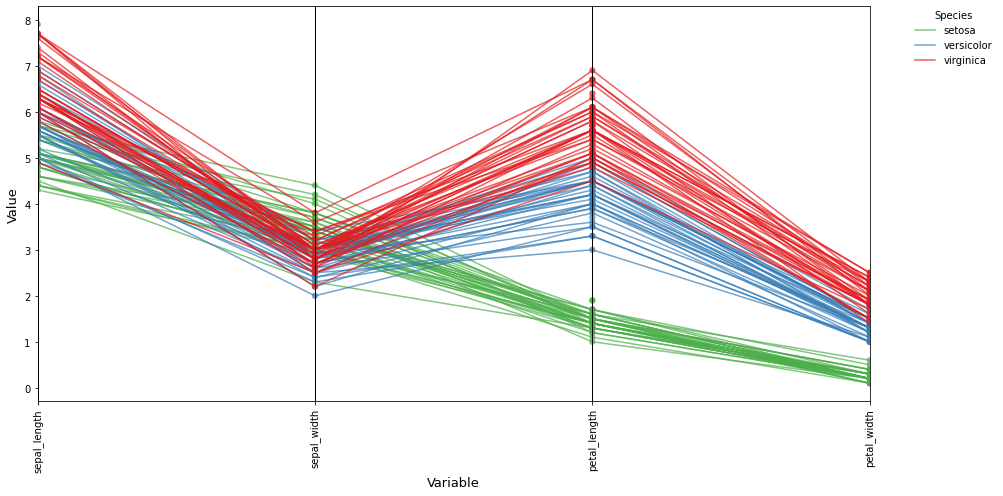

In [11]:
ax = PlotTools.parallele_coordinates_plot(iris_df, class_column='species', cmap='Set1',
                                     figsize=(14,7), x_title='Variable', y_title='Value', 
                                     axis_title_fontsize=13,
                                     plot_markers=True, marker_size=40, marker_type='o',
                                     marker_alpha=0.7, marker_linewidth=0,
                                     line_alpha=0.7, legend_title='Species',
                                     legend_frameon=False, xticks_rotation=90,
                                     y_gridlines=False)

#### Markers off 
(notice some values are not shown!)

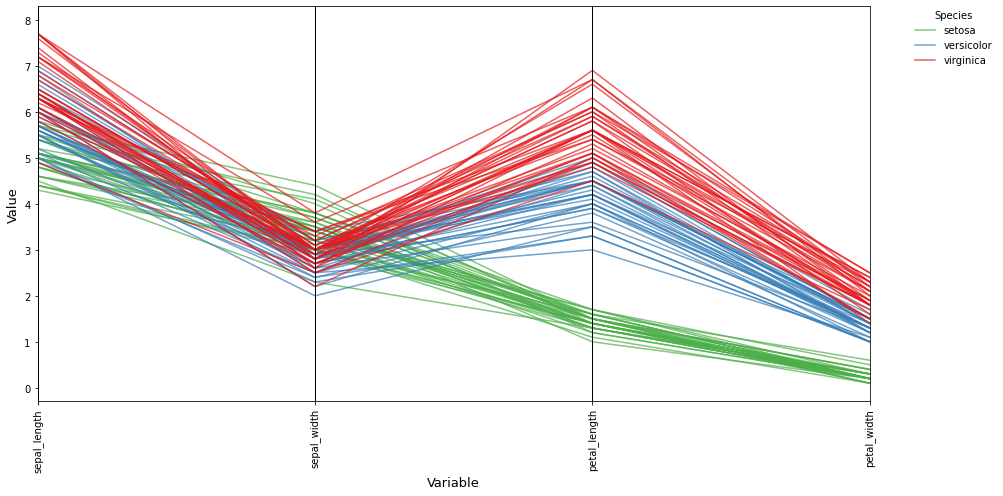

In [12]:
ax = PlotTools.parallele_coordinates_plot(iris_df, class_column='species', cmap='Set1',
                                     figsize=(14,7), x_title='Variable', y_title='Value', 
                                     axis_title_fontsize=13,
                                     plot_markers=False, marker_size=40, marker_type='o',
                                     marker_alpha=0.7, marker_linewidth=0,
                                     line_alpha=0.7, legend_title='Species',
                                     legend_frameon=False, xticks_rotation=90,
                                     y_gridlines=False)

# Boxplot

In [13]:
help(PlotTools.plot_boxplot)

Help on function plot_boxplot in module PlotTools:

plot_boxplot(seriesX, seriesY, seriesHue=None, stripplot=True, boxplot=True, saveFolder=None, ax=None, figsize=(7, 6), showf=False, plotTitle='', xTitle='', yTitle='', xRotation=45, titleFontSize=18, titleColor='maroon', legendTitle='', font_scale=1, snsStyle='ticks', boxTransparency=0.6, jitter=0.15, stripplot_alpha=0.7, stripplot_size=4, stripplot_color=None, linewidth=0, stripplot_palette=None, palette=None, order=None, xy_title_fontsize=14, boxplot_color=None, add_mean=False, mean_marker='_', mean_color='red', mean_size=100, mean_linewidth=3, mean_alpha=1, add_gmean=False, gmean_marker='_', gmean_color='blue', gmean_size=100, gmean_linewidth=3, gmean_alpha=1, hide_indices_in_stripplot=None, horizontal=False)
    # still needs fixing the hue in str
    # former plotBoxplot



#### Boxplot with data points (stripplot) - default values

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

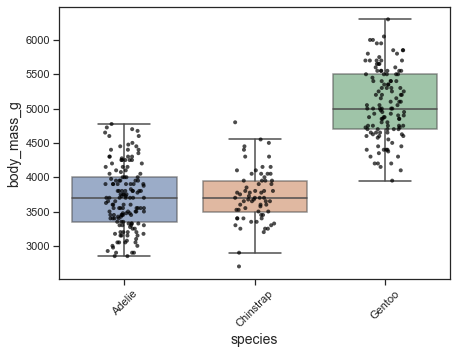

In [14]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
                       peng_df["body_mass_g"], # y values series
                       figsize=(7, 5))

#### Boxplot with data points (stripplot) + mean + change x order + some different styling

<AxesSubplot:title={'center':'Penguin Species Body Mass'}, xlabel='Species', ylabel='Body mass (g)'>

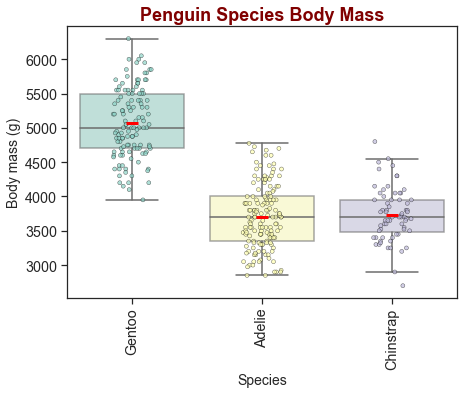

In [15]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
             peng_df["body_mass_g"], # y values series
             figsize=(7, 5), palette='Set3',
             plotTitle='Penguin Species Body Mass', 
             xTitle='Species', 
             yTitle='Body mass (g)',
             xRotation=90, 
             font_scale=1.3,
             order=['Gentoo', 'Adelie', 'Chinstrap'], 
             linewidth=0.4,
             add_mean=True,
             mean_size=150)

#### Only stripplot + mean

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

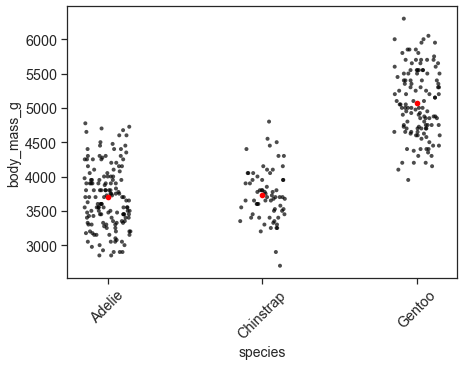

In [16]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
             peng_df["body_mass_g"], # y values series
             figsize=(7, 5), boxplot=False,
             font_scale=1.3,
             add_mean=True, mean_marker='o',
             mean_size=7)

#### Boxplot with data points (stripplot) + hue (category)
add_mean is currently not working with hue.

C:\Liel_new\Anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Penguin Species Body Mass'}, xlabel='Species', ylabel='Body mass (g)'>

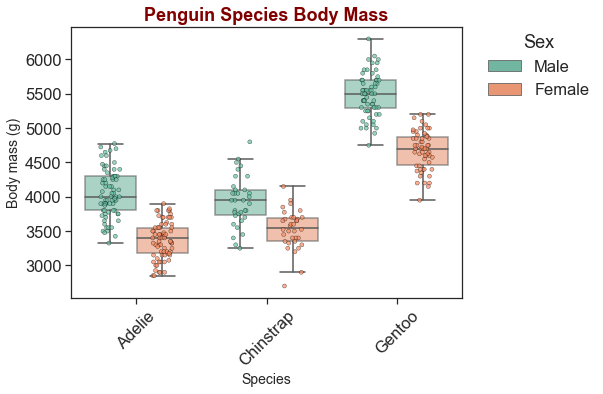

In [17]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
             peng_df["body_mass_g"], # y values series
             seriesHue=peng_df["sex"],
             figsize=(7, 5), palette='Set2',
             plotTitle='Penguin Species Body Mass', 
             xTitle='Species', 
             yTitle='Body mass (g)',
             legendTitle='Sex',
             font_scale=1.5,
             linewidth=0.4)

# Scatterplot with correlation

In [18]:
help(PlotTools.plot_scatter)

Help on function plot_scatter in module PlotTools:

plot_scatter(x_series, y_series, ax=None, figsize=(6, 5), show_reg_line=True, plt_corr_txt=True, plot_pearson=True, plot_spearman=True, plot_title='', x_title='', y_title='', font_scale=1, sns_style='ticks', markers_color='teal', markers_alpha=0.6, x_rotation=45, title_font_size=18, corr_font_size=14, title_color='maroon', xticks=None, axes_title_font_size=14, x_jitter=None, y_jitter=None, ylim=None, xlim=None, correl_text_x_loc=0.2, correl_text_y_loc=0.96, save_folder=None, save_full_path=None, x_log_scale=False, y_log_scale=False)
    @param x_series: pd.Series. x values series.
    @param y_series: pd.Series. y values series.
    @param ax: matplotlib axes object to plot over. Default None
    @param figsize: tuple (length 2) with numbers indicating figure size. Default (6, 5)
    @param show_reg_line: boolean. Whether to add a regression line. Default True
    @param plt_corr_txt: boolean. Whether to add correlation text. Default 

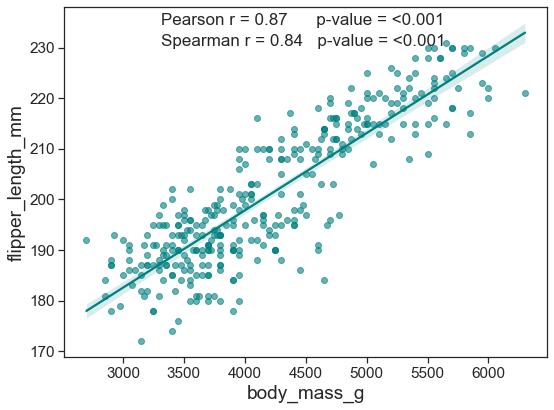

In [19]:
PlotTools.plot_scatter(peng_df["body_mass_g"], # x series
                       peng_df["flipper_length_mm"], # y series
                       figsize=(8, 6),
                       x_rotation=0, 
                       corr_font_size=17, font_scale=1.4,
                       axes_title_font_size=19,
                       correl_text_x_loc=0.2, correl_text_y_loc=0.95)

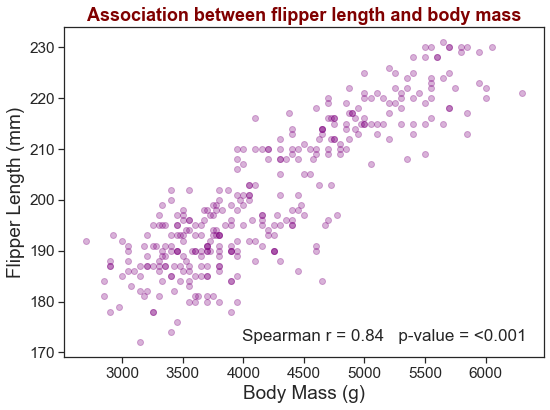

In [21]:
PlotTools.plot_scatter(peng_df["body_mass_g"], # x series
                       peng_df["flipper_length_mm"], # y series
                       figsize=(8, 6),
                       show_reg_line=False, plot_pearson=False,
                       plot_title='Association between flipper length and body mass',
                       x_title='Body Mass (g)',
                       y_title='Flipper Length (mm)',
                       markers_color='purple', markers_alpha=0.3,
                       x_rotation=0, 
                       corr_font_size=17, font_scale=1.4,
                       axes_title_font_size=19,
                       correl_text_x_loc=0.37, correl_text_y_loc=0.05)

# Violin Boxplot

In [22]:
help(PlotTools.plot_violin_boxplot)

Help on function plot_violin_boxplot in module PlotTools:

plot_violin_boxplot(df, x, y, cut_in_half=True, stripplot=True, figsize=(6, 5), xtitle=None, ytitle=None, palette='Set1', jitter=0.05, dot_size=4, dot_color='grey', violin_alpha=0.8, stripplot_alpha=0.3, boxplot_width=0.3, dots_x_offset=0.002, order=None, x_rotation=0, xy_title_fontsize=12, font_scale=1, violin_cut=2)
    Plot a violin plot with a boxplot and stripplot on top.
    
    :param df: pandas Dataframe from to plot data from
    :param x: string. x variable - column name from df
    :param y: string. y variable (numeric) - column name from df
    :param cut_in_half: boolean. cut violin plot in half such that stripplot
                        dots will be visible
    :param stripplot: boolean. add stripplot
    :param figsize: tuple of 2 numbers, default (6, 5)
    :param xtitle: x axis title. Default is None, then uses x column name
    :param ytitle: y axis title. Default is None, then uses x column name
    :param 

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

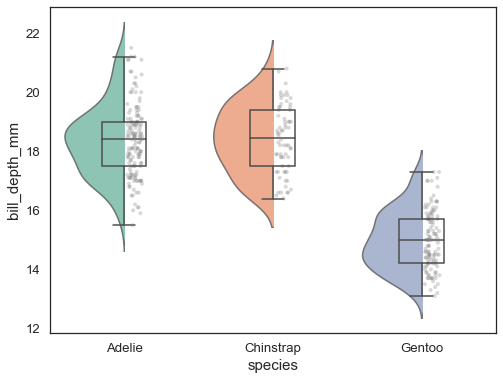

In [23]:
PlotTools.plot_violin_boxplot(peng_df, 'species', 'bill_depth_mm', 
                              figsize=(8,6), palette='Set2', 
                              font_scale=1.2, xy_title_fontsize=15)

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

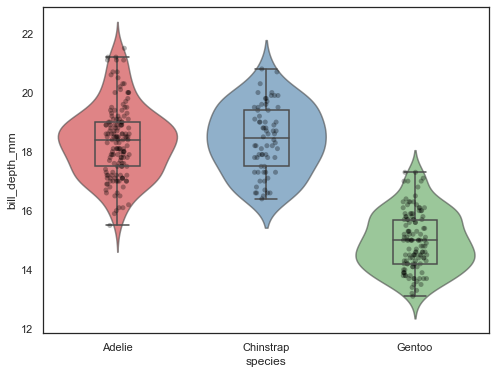

In [24]:
PlotTools.plot_violin_boxplot(peng_df, 'species', 'bill_depth_mm', 
                    figsize=(8,6), cut_in_half=False, stripplot=True,
                    palette='Set1', jitter=0.08, dot_size=5,
                    dot_color='black', violin_alpha=0.6,
                    dots_x_offset=0.002)

<AxesSubplot:xlabel='Species', ylabel='Bill Depth (mm)'>

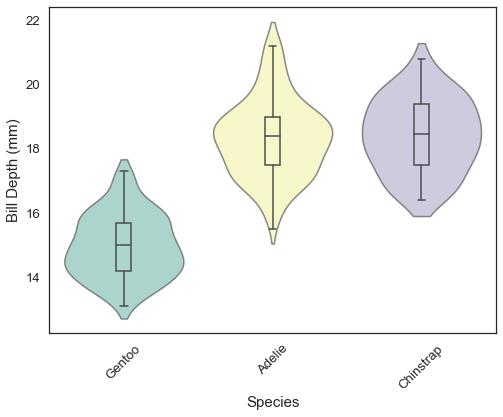

In [25]:
PlotTools.plot_violin_boxplot(peng_df, 'species', 'bill_depth_mm', 
                    figsize=(8,6), cut_in_half=False, stripplot=False,
                    xtitle='Species', ytitle='Bill Depth (mm)',
                    palette='Set3', jitter=0.1, dot_size=5,
                    violin_alpha=0.8, boxplot_width=0.1,
                    order=['Gentoo', 'Adelie', 'Chinstrap'], 
                    x_rotation=45, violin_cut=1,
                    xy_title_fontsize=15, font_scale=1.2)

# Heatmap

In [35]:
help(PlotTools.plot_heatmap)

Help on function plot_heatmap in module PlotTools:

plot_heatmap(numbersTable, cmap='YlGnBu', figsize=(8, 8), title='', title_fontsize=13, ax=None, font_scale=1, snsStyle='ticks', xRotation=0, yRotation=90, xlabel='', ylabel='', colormap_label='', vmin=None, vmax=None, supress_ticks=True, annotate_text=False, annotate_fontsize=8, annotation_format='.2f', mask=None, colorbar_ticks=None, hide_colorbar=False, xy_labels_fontsize=None, grid_linewidths=0, grid_linecolor='white', fix_smaller_rows_at_y_edges_bug=False)
    # former plotHeatmap_real



Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py


<AxesSubplot:title={'center':'Penguins'}, xlabel='Variable', ylabel='Penguin ID'>

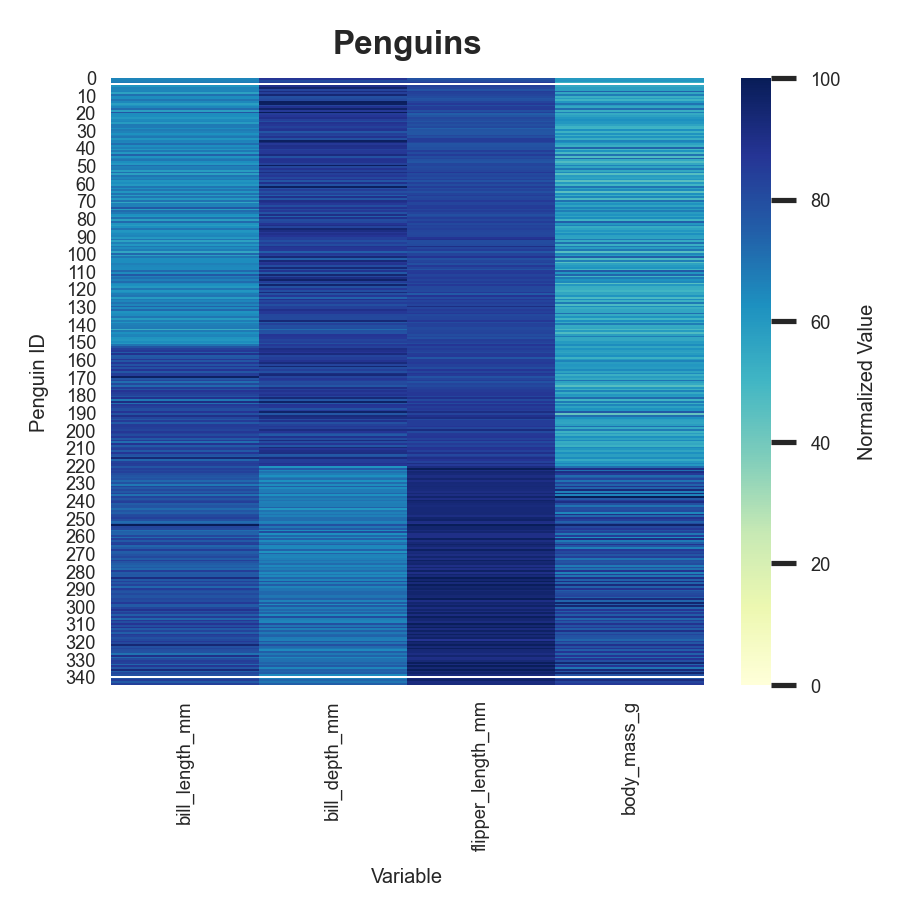

In [26]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
PlotTools.plot_heatmap(100 * peng_df[cols / peng_df[cols].max(), 
                      cmap='YlGnBu', figsize=(3, 3),
                      title='Penguins', title_fontsize=8, 
                      font_scale=0.4, xRotation=90, yRotation=0,
                      xlabel='Variable', ylabel='Penguin ID', colormap_label='Normalized Value',
                      vmin=0, vmax=None)

Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py


<AxesSubplot:xlabel='Variable', ylabel='Penguin ID'>

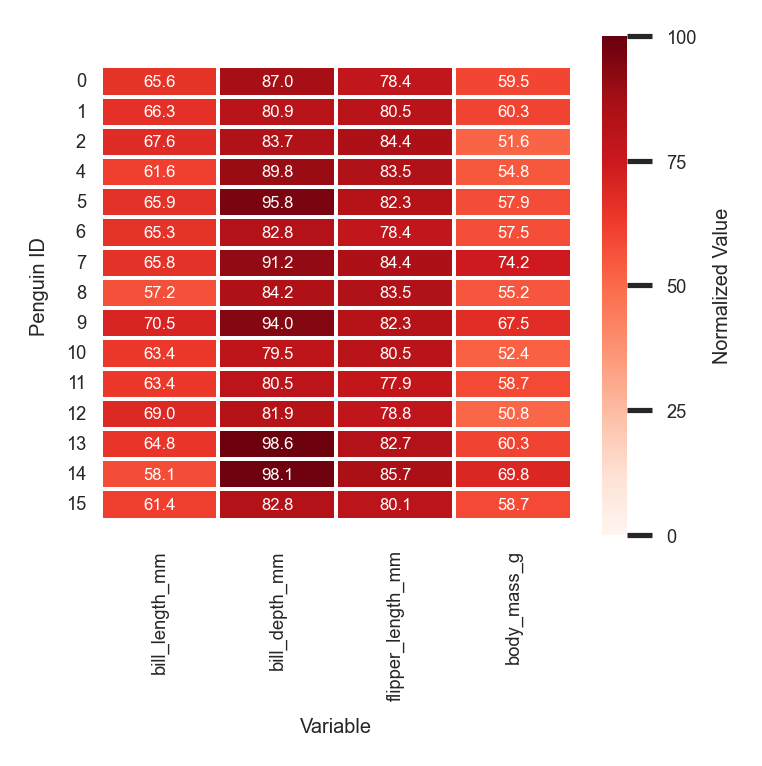

In [52]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
PlotTools.plot_heatmap(100 * (peng_df[cols] / peng_df[cols].max()).iloc[:15], 
                      cmap='Reds', figsize=(2.5, 2.5),
                      font_scale=0.4, xRotation=90, yRotation=0,
                      xlabel='Variable', ylabel='Penguin ID', colormap_label='Normalized Value',
                      vmin=0, vmax=100,
                      annotate_text=True, annotate_fontsize=4,
                      annotation_format=".1f",
                      grid_linewidths=0.5, grid_linecolor='white',
                      colorbar_ticks=[0,25,50,75,100],
                      fix_smaller_rows_at_y_edges_bug=True) # some versions have the first and last rows cut. This flag changed to True solves this

# Clustermap

In [44]:
(peng_df[cols] / peng_df[cols].max()).isna().sum()

2    4
dtype: int64

may be distorted and has to be redefined after the command.


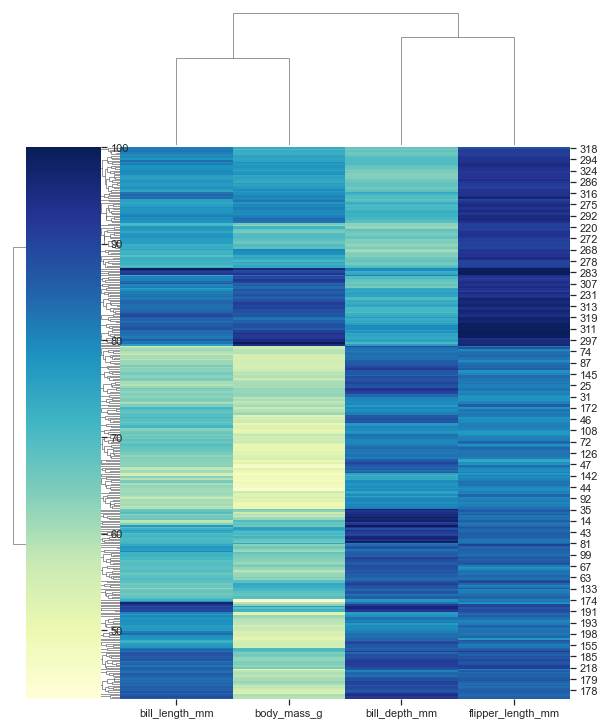

In [56]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
PlotTools.plot_clustermap(100 * (peng_df[cols] / peng_df[cols].max()), 
                    cmap='YlGnBu', figsize=(10, 10),
                    title='', title_fontsize=13, title_y_padding=0,
                    adjRight=0.8, adjBottom=0.3, adjLeft=None, adjTop=None,
                    row_clustering=True, col_clustering=True,
                    font_scale=1, snsStyle='ticks', vmin=None, vmax=None,
                    xlabel='', ylabel='', xRotation=0, yRotation=0,
                    xy_labels_fontsize=None,

                    mask=None,

                    cbar_title='', cbar_orient='vertical',
                    cbar_pos=None, cbar_vertical_left=False,
                    cbar_title_fontsize=None, cbar_ticks_fontsize=None,
                    hide_cbar=False,

                    linewidths=0, linecolor='white',

                    row_color_vals=None, row_cmap='Blues',
                    row_vmin=None, row_vmax=None,
                    row_color_labels=None,
                    row_color_lab_legend=True, row_color_lab_legend_loc='lower center',
                    row_color_lab_legend_ncol=4, row_color_labels_cmap='Set1',
                    row_color_labels_cmap_dict=None, row_color_labels_order=None,
                    row_color_legend_frameon=True,

                    col_color_vals=None, col_cmap='Blues',
                    col_vmin=None, col_vmax=None,
                    col_color_labels=None,
                    col_color_lab_legend=True, col_color_lab_legend_loc='lower center',
                    col_color_lab_legend_ncol=4, col_color_labels_cmap='Set1',
                    col_color_labels_cmap_dict=None, col_color_labels_order=None,
                    col_color_legend_frameon=True,

                    rowcol_color_legend_fontsize=10, rowcol_color_legend_title='',
                    rowcol_color_legend_title_fontsize=11,

                    col_names_to_frame=None, row_names_to_frame=None,
                    names_frame_color='black', names_frame_width=4,

                    xticklabels='auto', yticklabels='auto',
                    hide_ticks=False,

                    fix_smaller_rows_at_y_edges_bug=False)